<a href="https://colab.research.google.com/github/aaats781/TelecomX_parte2_ChallengeFAL/blob/main/TelecomX_parte2_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


In [2]:
df_telecomx_v1 = pd.read_json('TelecomX_Data.json')
df_telecomx_v1

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
df_telecomx_norm_v1 = pd.json_normalize(df_telecomx_v1.to_dict(orient='records'),sep='_')
df_telecomx_norm_v1

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [4]:
df_telecomx_norm_v1.shape

(7267, 21)

In [5]:
Proporcion_cancelados = df_telecomx_norm_v1['Churn'].value_counts()
Proporcion_cancelados

,count
Churn,
No,5174
Yes,1869
,224


In [6]:
df_filtrado_v1 = df_telecomx_norm_v1[df_telecomx_norm_v1['Churn']. isin(['Yes','No'])]
df_filtrado_v1

##Elimina los registros con data en blanco para eliminarlos del modelo

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [7]:
Cantidad_Registros = df_filtrado_v1['Churn'].value_counts()
Distribucion_Clientes = df_filtrado_v1['Churn'].value_counts(normalize = True)

tabla_resumen = pd.DataFrame({'Cantidad': Cantidad_Registros, 'Porcentaje': round(Distribucion_Clientes*100,4)})
tabla_resumen


,Cantidad,Porcentaje
Churn,,
No,5174,73.463
Yes,1869,26.537


In [8]:
df_filtrado_v1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

In [9]:
for col in df_filtrado_v1.columns:
    print(f"{col}  {df_filtrado_v1[col].unique()}")

customerID  ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn  ['No' 'Yes']
customer_gender  ['Female' 'Male']
customer_SeniorCitizen  [0 1]
customer_Partner  ['Yes' 'No']
customer_Dependents  ['Yes' 'No']
customer_tenure  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
phone_PhoneService  ['Yes' 'No']
phone_MultipleLines  ['No' 'Yes' 'No phone service']
internet_InternetService  ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity  ['No' 'Yes' 'No internet service']
internet_OnlineBackup  ['Yes' 'No' 'No internet service']
internet_DeviceProtection  ['No' 'Yes' 'No internet service']
internet_TechSupport  ['Yes' 'No' 'No internet service']
internet_StreamingTV  ['Yes' 'No' 'No internet service']
internet_StreamingMovies  ['No' 'Yes' 'No internet service']
account_Contract  

In [10]:

churn_v2 = df_filtrado_v1['Churn'].replace({'Yes':1,'No':0 }).astype(int)
customer_gender_v2 = pd.get_dummies(df_filtrado_v1['customer_gender'], prefix= 'customer_gender')
customer_SeniorCitizen_v2 = df_filtrado_v1['customer_SeniorCitizen']
customer_Partner_v2 = df_filtrado_v1['customer_Partner'].replace({'Yes':1,'No':0}).astype(int)
customer_Dependents_v2 = df_filtrado_v1['customer_Dependents'].replace({'Yes':1,'No':0 }).astype(int)
customer_tenure_v2 = df_filtrado_v1['customer_tenure'].astype(int)
phone_PhoneService_v2 = df_filtrado_v1['phone_PhoneService'].replace({'Yes':1,'No':0}).astype(int)
phone_MultipleLines_v2 = df_filtrado_v1['phone_MultipleLines'].replace({'Yes':1,'No':0, 'No phone service':0 }).astype(int)
internet_InternetService_v2 = df_filtrado_v1['internet_InternetService'].replace({'Fiber optic':1,'DSL':1, 'No':0}).astype(int)
internet_OnlineSecurity_v2 = df_filtrado_v1['internet_OnlineSecurity'].replace({'Yes':1,'No':0, 'No internet service':0 }).astype(int)
internet_OnlineBackup_v2 = df_filtrado_v1['internet_OnlineBackup'].replace({'Yes':1,'No':0, 'No internet service':0 }).astype(int)
internet_DeviceProtection_v2 = df_filtrado_v1['internet_DeviceProtection'].replace({'Yes':1,'No':0, 'No internet service':0 }).astype(int)
internet_TechSupport_v2 = df_filtrado_v1['internet_TechSupport'].replace({'Yes':1,'No':0, 'No internet service':0 }).astype(int)
internets_StreamingTV_v2 = df_filtrado_v1['internet_StreamingTV'].replace({'Yes':1,'No':0, 'No internet service':0 }).astype(int)
internet_StreamingMovies_v2 = df_filtrado_v1['internet_StreamingMovies'].replace({'Yes':1,'No':0, 'No internet service':0 }).astype(int)
account_Contract_v2 = pd.get_dummies(df_filtrado_v1['account_Contract'], prefix= 'account_Contract')
account_PaperlessBilling_v2 = df_filtrado_v1['account_PaperlessBilling'].replace({'Yes':1,'No':0, 'No phone service':0 }).astype(int)
account_PaymentMethod_v2 = pd.get_dummies(df_filtrado_v1['account_PaymentMethod'], prefix= 'account_PaymentMethod')
account_Charges_Monthly_v2 = df_filtrado_v1['account_Charges_Monthly'].astype(float)
account_Charges_Total_v2 = pd.to_numeric(df_filtrado_v1['account_Charges_Total'], errors='coerce').fillna(0)


df_filtrado_normalizado_v1 = pd.concat([

    churn_v2,
    customer_gender_v2,
    customer_SeniorCitizen_v2,
    customer_Partner_v2,
    customer_Dependents_v2,
    customer_tenure_v2,
    phone_PhoneService_v2,
    phone_MultipleLines_v2,
    internet_InternetService_v2,
    internet_OnlineSecurity_v2,
    internet_OnlineBackup_v2,
    internet_DeviceProtection_v2,
    internet_TechSupport_v2,
    internets_StreamingTV_v2,
    internet_StreamingMovies_v2,
    account_Contract_v2,
    account_PaperlessBilling_v2,
    account_PaymentMethod_v2,
    account_Charges_Monthly_v2,
    account_Charges_Total_v2
    ], axis=1)
df_filtrado_normalizado_v1

/tmp/ipython-input-1104352477.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn_v2 = df_filtrado_v1['Churn'].replace({'Yes':1,'No':0 }).astype(int)
/tmp/ipython-input-1104352477.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_Partner_v2 = df_filtrado_v1['customer_Partner'].replace({'Yes':1,'No':0}).astype(int)
/tmp/ipython-input-1104352477.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objec

,Churn,customer_gender_Female,customer_gender_Male,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,account_Contract_Month-to-month,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling,account_PaymentMethod_Bank transfer (automatic),account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check,account_Charges_Monthly,account_Charges_Total
0,0,True,False,0,1,1,9,1,0,1,...,False,True,False,1,False,False,False,True,65.60,593.30
1,0,False,True,0,0,0,9,1,1,1,...,True,False,False,0,False,False,False,True,59.90,542.40
2,1,False,True,0,0,0,4,1,0,1,...,True,False,False,1,False,False,True,False,73.90,280.85
3,1,False,True,1,1,0,13,1,0,1,...,True,False,False,1,False,False,True,False,98.00,1237.85
4,1,True,False,1,1,0,3,1,0,1,...,True,False,False,1,False,False,False,True,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,True,False,0,0,0,13,1,0,1,...,False,True,False,0,False,False,False,True,55.15,742.90
7263,1,False,True,0,1,0,22,1,1,1,...,True,False,False,1,False,False,True,False,85.10,1873.70
7264,0,False,True,0,0,0,2,1,0,1,...,True,False,False,1,False,False,False,True,50.30,92.75
7265,0,False,True,0,1,1,67,1,0,1,...,False,False,True,0,False,False,False,True,67.85,4627.65


In [11]:
df_filtrado_normalizado_v1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7043 non-null   int64  
 1   customer_gender_Female                           7043 non-null   bool   
 2   customer_gender_Male                             7043 non-null   bool   
 3   customer_SeniorCitizen                           7043 non-null   int64  
 4   customer_Partner                                 7043 non-null   int64  
 5   customer_Dependents                              7043 non-null   int64  
 6   customer_tenure                                  7043 non-null   int64  
 7   phone_PhoneService                               7043 non-null   int64  
 8   phone_MultipleLines                              7043 non-null   int64  
 9   internet_InternetService           

In [12]:
columnas_v1 = df_filtrado_normalizado_v1.columns.tolist()
columnas_v1

['Churn',
 'customer_gender_Female',
 'customer_gender_Male',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'phone_MultipleLines',
 'internet_InternetService',
 'internet_OnlineSecurity',
 'internet_OnlineBackup',
 'internet_DeviceProtection',
 'internet_TechSupport',
 'internet_StreamingTV',
 'internet_StreamingMovies',
 'account_Contract_Month-to-month',
 'account_Contract_One year',
 'account_Contract_Two year',
 'account_PaperlessBilling',
 'account_PaymentMethod_Bank transfer (automatic)',
 'account_PaymentMethod_Credit card (automatic)',
 'account_PaymentMethod_Electronic check',
 'account_PaymentMethod_Mailed check',
 'account_Charges_Monthly',
 'account_Charges_Total']

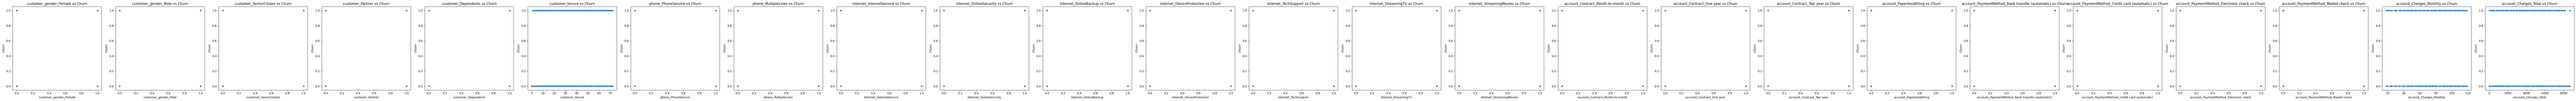

In [13]:
variables_x = ['customer_gender_Female',
               'customer_gender_Male',
               'customer_SeniorCitizen',
               'customer_Partner',
               'customer_Dependents',
               'customer_tenure',
               'phone_PhoneService',
               'phone_MultipleLines',
               'internet_InternetService',
               'internet_OnlineSecurity',
               'internet_OnlineBackup',
               'internet_DeviceProtection',
               'internet_TechSupport',
               'internet_StreamingTV',
               'internet_StreamingMovies',
               'account_Contract_Month-to-month',
               'account_Contract_One year',
               'account_Contract_Two year',
               'account_PaperlessBilling',
               'account_PaymentMethod_Bank transfer (automatic)',
               'account_PaymentMethod_Credit card (automatic)',
               'account_PaymentMethod_Electronic check',
               'account_PaymentMethod_Mailed check',
               'account_Charges_Monthly',
               'account_Charges_Total']
variable_y = 'Churn'


fig, axs = plt.subplots(1, len(variables_x), figsize=(5 * len(variables_x), 5))

for i, x in enumerate(variables_x):
    sns.scatterplot(x=df_filtrado_normalizado_v1[x], y=df_filtrado_normalizado_v1[variable_y], ax=axs[i])
    axs[i].set_title(f'{x} vs {variable_y}')
plt.tight_layout()
plt.show()

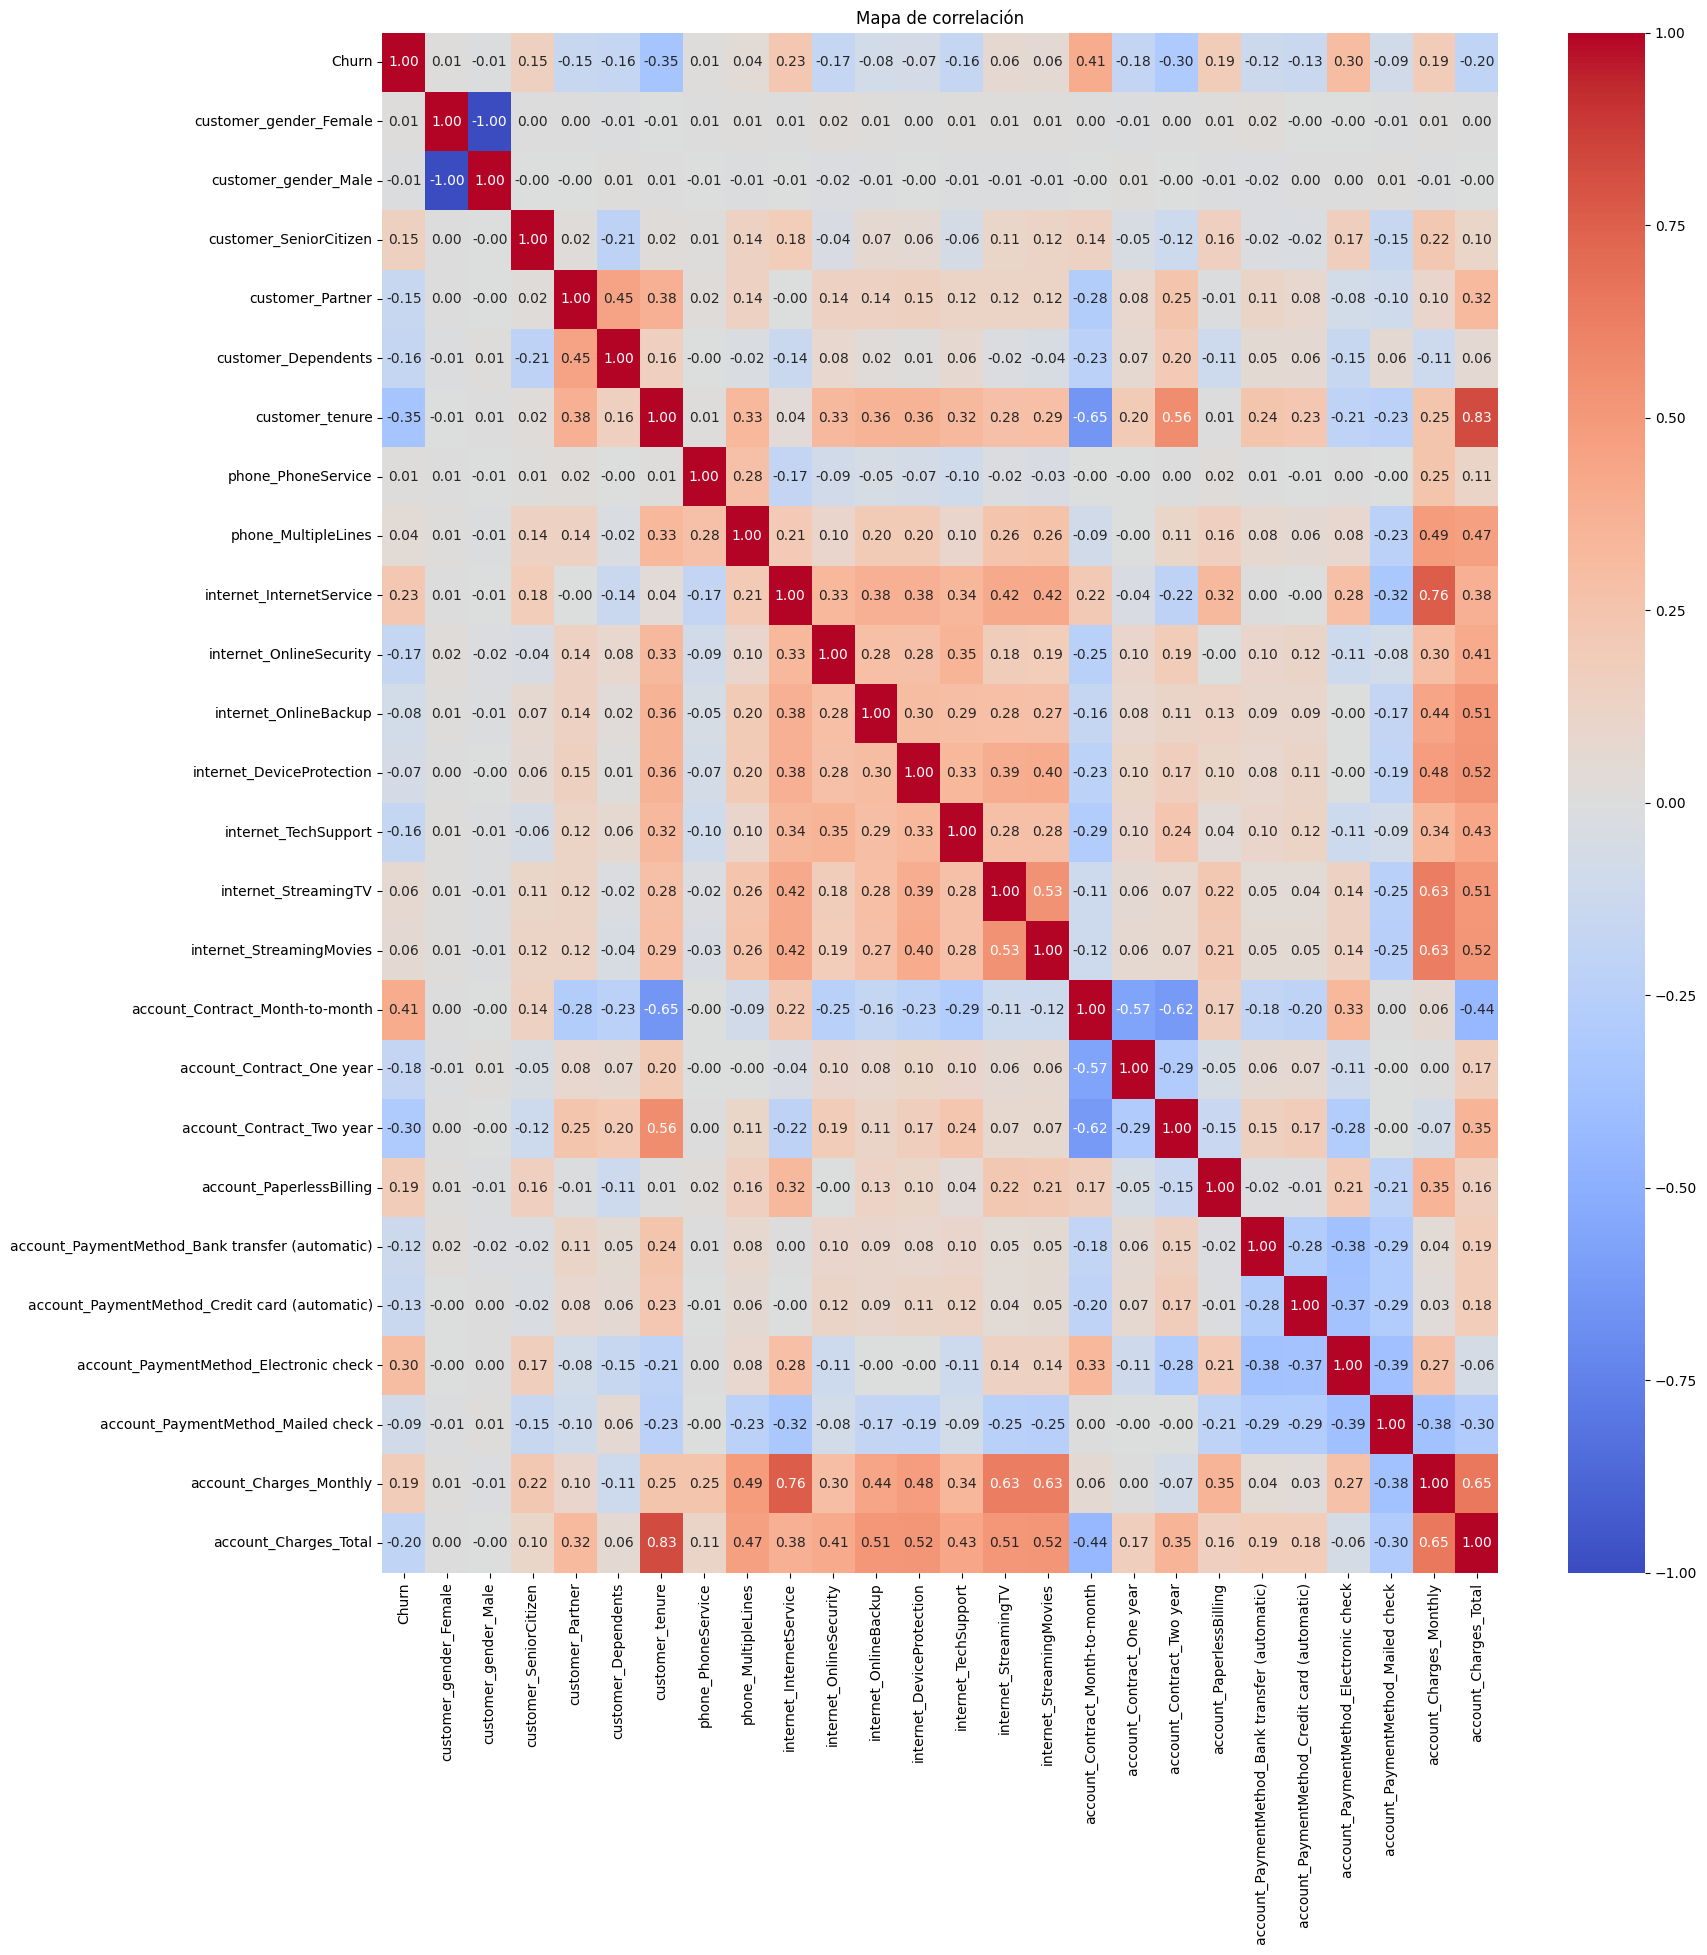

In [14]:
corr = df_filtrado_normalizado_v1.corr()

plt.figure(figsize=(18,20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de correlación')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier

X = df_filtrado_normalizado_v1.drop('Churn', axis=1)
y = df_filtrado_normalizado_v1['Churn']

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False).head(10)

,Feature,Importance
23,account_Charges_Monthly,0.192581
24,account_Charges_Total,0.189029
5,customer_tenure,0.155577
15,account_Contract_Month-to-month,0.074089
21,account_PaymentMethod_Electronic check,0.037521
18,account_PaperlessBilling,0.026738
9,internet_OnlineSecurity,0.022309
3,customer_Partner,0.022252
17,account_Contract_Two year,0.021764
10,internet_OnlineBackup,0.021394


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_filtrado_normalizado_v1.drop('Churn', axis=1)  # Variables predictoras
y = df_filtrado_normalizado_v1['Churn']               # Variable a predecir


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)
print("Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("R² (score):", r2_score(y_test, y_pred))


if X.shape[1] == 1:
    plt.scatter(X_test, y_test, color='blue', label='Datos reales')
    plt.plot(X_test, y_pred, color='red', label='Predicciones')
    plt.xlabel('Variable independiente')
    plt.ylabel('Variable dependiente')
    plt.title('Regresión Lineal')
    plt.legend()
    plt.show()
else:
    print("La gráfica solo está disponible si tienes una variable independiente.")

Coeficientes: [ 2.26925105e-03 -2.26925105e-03  3.80344896e-02 -1.87655407e-03
 -1.83366214e-02 -1.87672578e-03 -1.74522001e-01  2.18861892e-02
 -3.37757650e-02 -7.47141523e-02 -5.75512774e-02 -3.25918957e-02
 -8.19726782e-02 -1.29467356e-02 -2.21799084e-02  6.52338239e-02
 -4.84525138e-02 -1.67813102e-02  3.89043974e-02 -1.55094837e-02
 -2.41562631e-02  6.09126241e-02 -2.12468773e-02  6.97624747e-03
 -4.46776476e-05]
Intercepto: 0.1886558841143075
Error cuadrático medio (MSE): 0.1416628053746373
R² (score): 0.27220471622924514
La gráfica solo está disponible si tienes una variable independiente.


Accuracy: 0.8097941802696949

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Matriz de confusión:
 [[937  99]
 [169 204]]


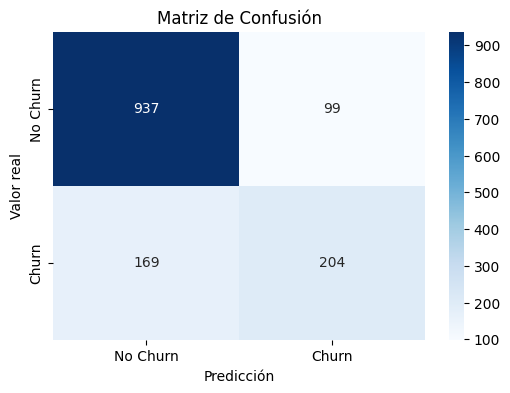

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df_filtrado_normalizado_v1.drop('Churn', axis=1)  # Features
y = df_filtrado_normalizado_v1['Churn']               # Target binario (0/1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()


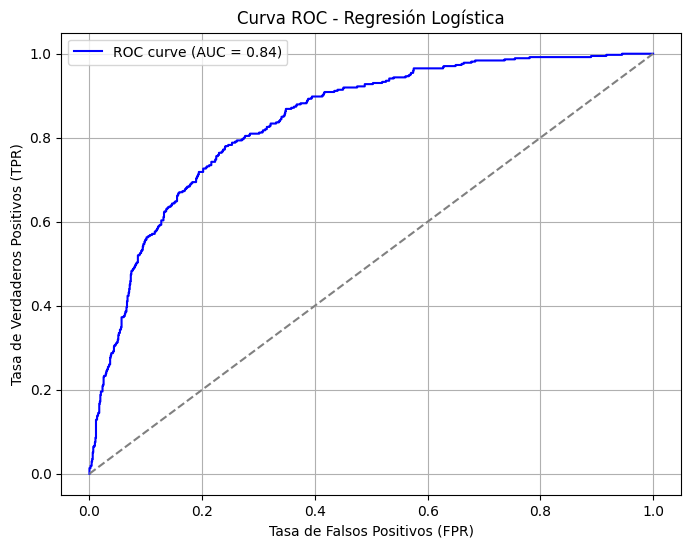

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score



# 1. Entrenar el modelo (si no lo has hecho ya)

model = LogisticRegression(max_iter= 5000)
model.fit(X_train, y_train)

# 2. Obtener las probabilidades (no las clases)
y_prob = model.predict_proba(X_test)[:, 1]  # Solo la probabilidad de clase 1 (Churn)

# 3. Calcular FPR, TPR y umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 4. Calcular el AUC (Área bajo la curva)
auc = roc_auc_score(y_test, y_prob)

# 5. Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea base
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
df_filtrado_normalizado_v2 = pd.concat([

    df_filtrado_normalizado_v1['Churn'],
    df_filtrado_normalizado_v1['account_Charges_Monthly'],
    df_filtrado_normalizado_v1['account_Charges_Total'],
    df_filtrado_normalizado_v1['customer_tenure'],
    df_filtrado_normalizado_v1['account_Contract_Month-to-month'],
    df_filtrado_normalizado_v1['account_PaymentMethod_Electronic check'],
    df_filtrado_normalizado_v1['account_Contract_Two year'],
    df_filtrado_normalizado_v1['account_PaperlessBilling'],
    df_filtrado_normalizado_v1['internet_OnlineSecurity'],
    df_filtrado_normalizado_v1['customer_Partner'],
    df_filtrado_normalizado_v1['customer_SeniorCitizen']
    ], axis=1)
df_filtrado_normalizado_v2

,Churn,account_Charges_Monthly,account_Charges_Total,customer_tenure,account_Contract_Month-to-month,account_PaymentMethod_Electronic check,account_Contract_Two year,account_PaperlessBilling,internet_OnlineSecurity,customer_Partner,customer_SeniorCitizen
0,0,65.60,593.30,9,False,False,False,1,0,1,0
1,0,59.90,542.40,9,True,False,False,0,0,0,0
2,1,73.90,280.85,4,True,True,False,1,0,0,0
3,1,98.00,1237.85,13,True,True,False,1,0,1,1
4,1,83.90,267.40,3,True,False,False,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7262,0,55.15,742.90,13,False,False,False,0,1,0,0
7263,1,85.10,1873.70,22,True,True,False,1,0,1,0
7264,0,50.30,92.75,2,True,False,False,1,0,0,0
7265,0,67.85,4627.65,67,False,False,True,0,1,1,0


Accuracy: 0.8026969481902059

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.66      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Matriz de confusión:
 [[938  98]
 [180 193]]


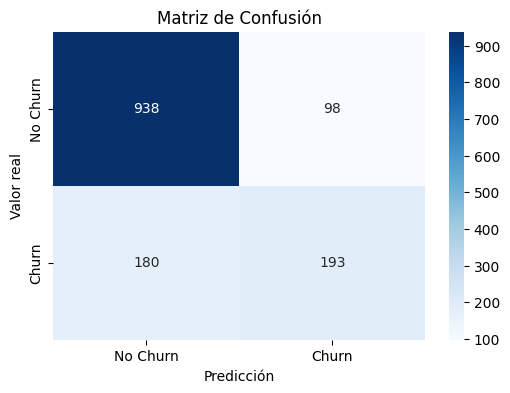

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_v2 = df_filtrado_normalizado_v2.drop('Churn', axis=1)  # Features
y_v2 = df_filtrado_normalizado_v2['Churn']               # Target binario (0/1)


X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y_v2, test_size=0.2, random_state=42)


model_v2 = LogisticRegression(max_iter=5000)
model_v2.fit(X_train_v2, y_train_v2)


y_pred_v2 = model_v2.predict(X_test_v2)


print("Accuracy:", accuracy_score(y_test_v2, y_pred_v2))
print("\nReporte de clasificación:\n", classification_report(y_test_v2, y_pred_v2))
print("\nMatriz de confusión:\n", confusion_matrix(y_test_v2, y_pred_v2))


cm = confusion_matrix(y_test_v2, y_pred_v2)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()

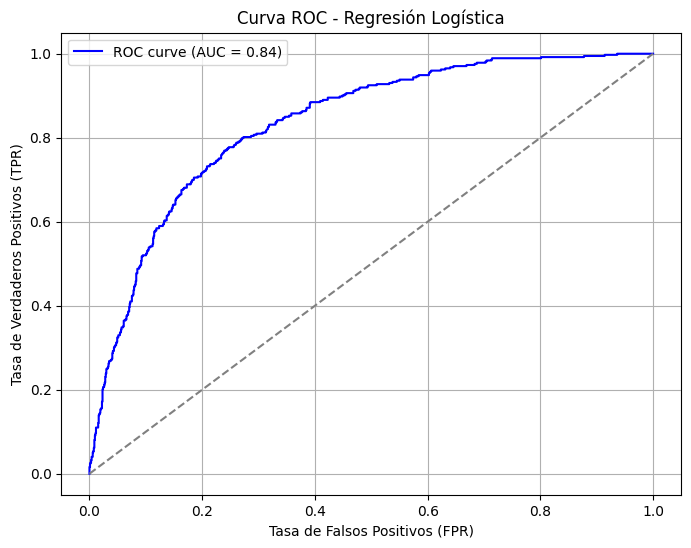

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score



# 1. Entrenar el modelo (si no lo has hecho ya)

model_v2 = LogisticRegression(max_iter= 5000)
model_v2.fit(X_train_v2, y_train_v2)

# 2. Obtener las probabilidades (no las clases)
y_prob_v2 = model_v2.predict_proba(X_test_v2)[:, 1]  # Solo la probabilidad de clase 1 (Churn)

# 3. Calcular FPR, TPR y umbrales
fpr_v2, tpr_v2, thresholds_v2 = roc_curve(y_test_v2, y_prob_v2)

# 4. Calcular el AUC (Área bajo la curva)
auc_v2 = roc_auc_score(y_test_v2, y_prob_v2)

# 5. Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr_v2, tpr_v2, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea base
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
df_filtrado_normalizado_v3 = pd.concat([
    df_filtrado_normalizado_v1['Churn'],
    df_filtrado_normalizado_v1['customer_SeniorCitizen'],
    df_filtrado_normalizado_v1['customer_Partner'],
    df_filtrado_normalizado_v1['customer_Dependents'],
    df_filtrado_normalizado_v1['customer_tenure'],
    df_filtrado_normalizado_v1['internet_InternetService'],
    df_filtrado_normalizado_v1['internet_OnlineSecurity'],
    df_filtrado_normalizado_v1['internet_TechSupport'],
    df_filtrado_normalizado_v1['account_Contract_Month-to-month'],
    df_filtrado_normalizado_v1['account_Contract_One year'],
    df_filtrado_normalizado_v1['account_Contract_Two year'],
    df_filtrado_normalizado_v1['account_PaperlessBilling'],
    df_filtrado_normalizado_v1['account_PaymentMethod_Bank transfer (automatic)'],
    df_filtrado_normalizado_v1['account_PaymentMethod_Electronic check'],
    df_filtrado_normalizado_v1['account_Charges_Monthly'],
    df_filtrado_normalizado_v1['account_Charges_Total']
    ], axis=1)
df_filtrado_normalizado_v3

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,internet_InternetService,internet_OnlineSecurity,internet_TechSupport,account_Contract_Month-to-month,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling,account_PaymentMethod_Bank transfer (automatic),account_PaymentMethod_Electronic check,account_Charges_Monthly,account_Charges_Total
0,0,0,1,1,9,1,0,1,False,True,False,1,False,False,65.60,593.30
1,0,0,0,0,9,1,0,0,True,False,False,0,False,False,59.90,542.40
2,1,0,0,0,4,1,0,0,True,False,False,1,False,True,73.90,280.85
3,1,1,1,0,13,1,0,0,True,False,False,1,False,True,98.00,1237.85
4,1,1,1,0,3,1,0,1,True,False,False,1,False,False,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,13,1,1,1,False,True,False,0,False,False,55.15,742.90
7263,1,0,1,0,22,1,0,0,True,False,False,1,False,True,85.10,1873.70
7264,0,0,0,0,2,1,0,0,True,False,False,1,False,False,50.30,92.75
7265,0,0,1,1,67,1,1,1,False,False,True,0,False,False,67.85,4627.65


Accuracy: 0.8062455642299503

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Matriz de confusión:
 [[932 104]
 [169 204]]


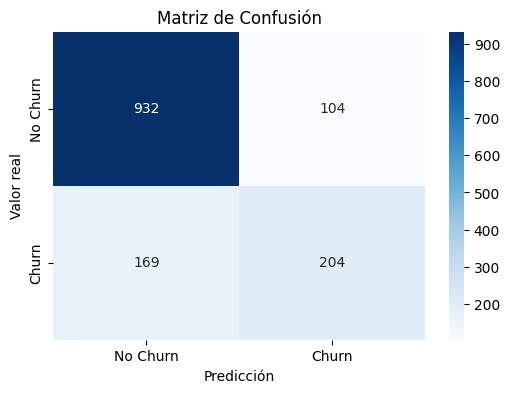

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_v3 = df_filtrado_normalizado_v3.drop('Churn', axis=1)  # Features
y_v3 = df_filtrado_normalizado_v3['Churn']               # Target binario (0/1)


X_train_v3, X_test_v3, y_train_v3, y_test_v3 = train_test_split(X_v3, y_v3, test_size=0.2, random_state=42)


model_v3 = LogisticRegression(max_iter=5000)
model_v3.fit(X_train_v3, y_train_v3)


y_pred_v3 = model_v3.predict(X_test_v3)


print("Accuracy:", accuracy_score(y_test_v3, y_pred_v3))
print("\nReporte de clasificación:\n", classification_report(y_test_v3, y_pred_v3))
print("\nMatriz de confusión:\n", confusion_matrix(y_test_v3, y_pred_v3))


cm = confusion_matrix(y_test_v3, y_pred_v3)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



X = df_filtrado_normalizado_v1.drop('Churn', axis=1)
y = df_filtrado_normalizado_v1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)




model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

# Evaluar resultados
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1552
           1       0.58      0.54      0.56       561

    accuracy                           0.77      2113
   macro avg       0.71      0.70      0.70      2113
weighted avg       0.77      0.77      0.77      2113

[[1329  223]
 [ 257  304]]


In [25]:
print(y_train.value_counts())
print(pd.Series(y_train_res).value_counts())

Churn
0    3622
1    1308
Name: count, dtype: int64
Churn
0    3622
1    3622
Name: count, dtype: int64


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Supongamos que ya tenés tus datos:
X = df_filtrado_normalizado_v1.drop('Churn', axis=1)
y = df_filtrado_normalizado_v1['Churn']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear el modelo KNN con k=5 vecinos (valor por defecto)
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Predecir con el set de prueba
y_pred = knn.predict(X_test)

# Evaluar resultados
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1552
           1       0.55      0.46      0.50       561

    accuracy                           0.76      2113
   macro avg       0.68      0.66      0.67      2113
weighted avg       0.74      0.76      0.75      2113

[[1342  210]
 [ 304  257]]


              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1552
           1       0.50      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.75      2113

[[1105  447]
 [ 110  451]]


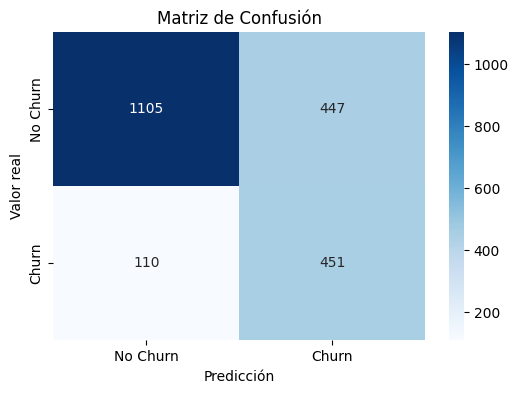

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Datos
X = df_filtrado_normalizado_v1.drop('Churn', axis=1)
y = df_filtrado_normalizado_v1['Churn']

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Escalar variables (muy recomendado para regresión logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear modelo
model = LogisticRegression(class_weight='balanced', random_state=42)

# Entrenar
model.fit(X_train_scaled, y_train)

# Predecir
y_pred = model.predict(X_test_scaled)

# Evaluar
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



cm_fn = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm_fn, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()



In [31]:
# Lista de nombres de columnas (sin la columna 'Churn')
features = df_filtrado_normalizado_v1.drop('Churn', axis=1).columns

# Coeficientes del modelo
coefs = model.coef_[0]

# DataFrame con resultados ordenados
importancia_df = pd.DataFrame({
    'Variable': features,
    'Coeficiente': coefs
}).sort_values(by='Coeficiente', ascending=False)

print(importancia_df)

                                           Variable  Coeficiente
23                          account_Charges_Monthly     0.776493
24                            account_Charges_Total     0.682493
15                  account_Contract_Month-to-month     0.318176
18                         account_PaperlessBilling     0.200023
21           account_PaymentMethod_Electronic check     0.137989
2                            customer_SeniorCitizen     0.068204
8                          internet_InternetService     0.063954
7                               phone_MultipleLines     0.037412
0                            customer_gender_Female     0.022292
3                                  customer_Partner    -0.017563
1                              customer_gender_Male    -0.022292
13                             internet_StreamingTV    -0.032893
14                         internet_StreamingMovies    -0.036995
19  account_PaymentMethod_Bank transfer (automatic)    -0.041885
16                       

#Modelo de regresión logística balanceada

##Introducción
Se crea un modelo que determina los principales factores que aumentan la cancelación, con el fin de ayuda a la empresa Telecom X a predecir con precisión los clientes que pueden finalizar su contrato, para ello se analiza una base de clientes con 7267 clientes y 21 columnas de características para definir un modelo.
La base original se envía en formato JSON, el cual posee 5174 clientes activos y 1869 clientes que cancelaron, además de 224 clientes que no posee resultados; debido a ello se eliminan los 224 clientes sin resultados para analizar solo 7043 clientes.

##Proceso
Se procede a cambiar a formato numeral todas las variables de texto y dejar en booleano las respuestas de si/no; asimismo se usa el proceso getdummy para las variables con 3 o más características como se observa en el cuadro:

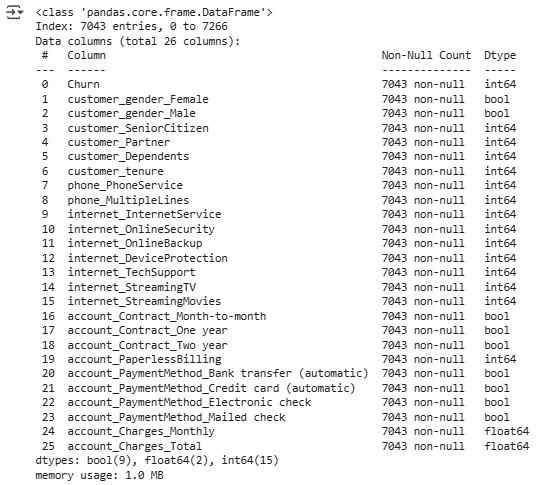

Se realiza por protocolo gráficos de correlación, sin embargo, es resultado no es muy relevante debido a la naturaleza binaria del modelo, pero se crea un modelo de ramdonforest y una matriz de correlación para identificar las características mas influyentes.


###Características más importantes

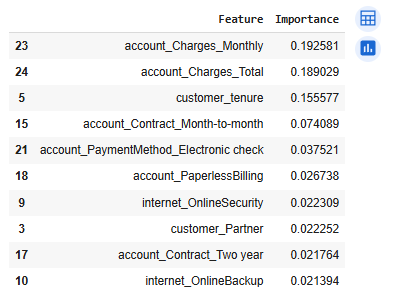


A partir de ello se genera un modelo de regresión el cual genera una buena presión y una curva de ROC de 0.84.

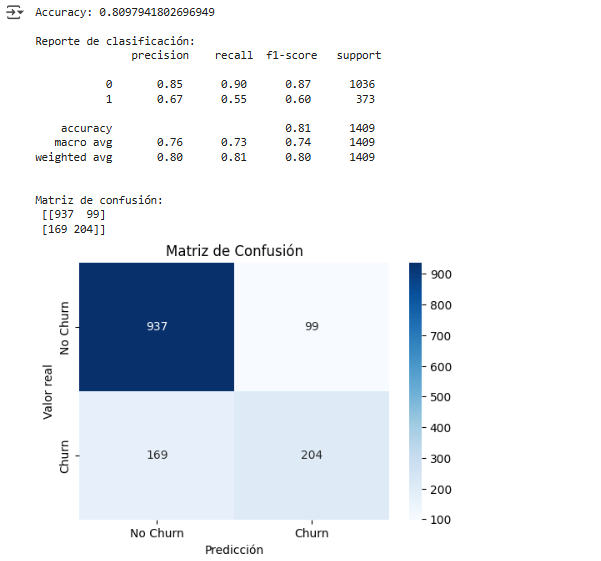


Se procede a crear 2 modelos más basados en la eliminación de características sin embargo no brindan resultados esperados por lo cual se mantiene la base como en el modelo 1.

Por ultimo con el fin de mejorar los aciertos para los clientes que cancelan, se procede con un modelo balanceado con el cual se obtiene el siguiente resultado:

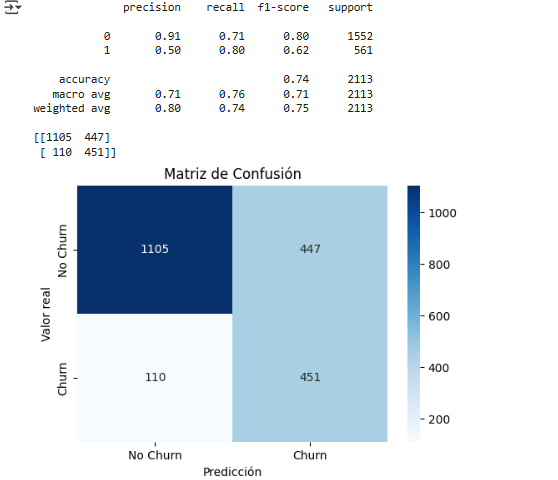


Por último, se obtiene el coeficiente de las variables.

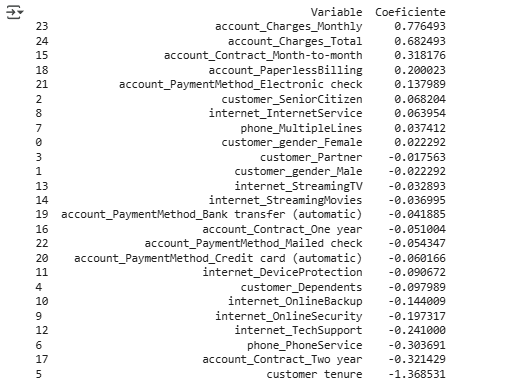


Con ello se obtiene que los factores que aumentan la probabilidad de cancelación son:

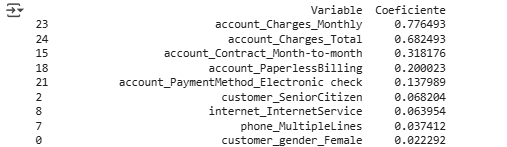

Además de los factores que ayudan a retener los clientes como el tiempo de ser cliente o los contratos longevos.

##Estrategias de retención

###Incentivar contratos a largo plazo
Ofrecer beneficios claros para que los clientes opten por contratos de uno o dos años, disminuyendo la flexibilidad para cancelar y aumentando la fidelidad.

###Revisar comunicación de cobros
Especialmente para clientes con cargos mensuales altos, mejoras en el servicio o personalización.

###Revisar métodos de pago
Incentivar métodos de pago que se asocian a menor cancelación, por ejemplo, transferencias bancarias o tarjetas, y monitorear el uso de cheque electrónico.

##Conclusión
Este análisis proporciona un diagnóstico claro de los factores que más influyen en la cancelación de clientes y sugiere acciones concretas para mejorar la retención. La combinación de análisis estadístico y conocimiento de negocio permitirá diseñar estrategias efectivas y focalizadas para reducir el churn y mejorar la rentabilidad.




